##**Compare the PyPDF2 and OCR methods to extract text**

In [7]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pdf2image
!pip install PyPDF2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 4.1 MB/s 


In [8]:
import pytesseract
import cv2
import pdf2image
import PyPDF2
from PIL import Image

##**Original and OCR**

Saving tester.jpg to tester (5).jpg


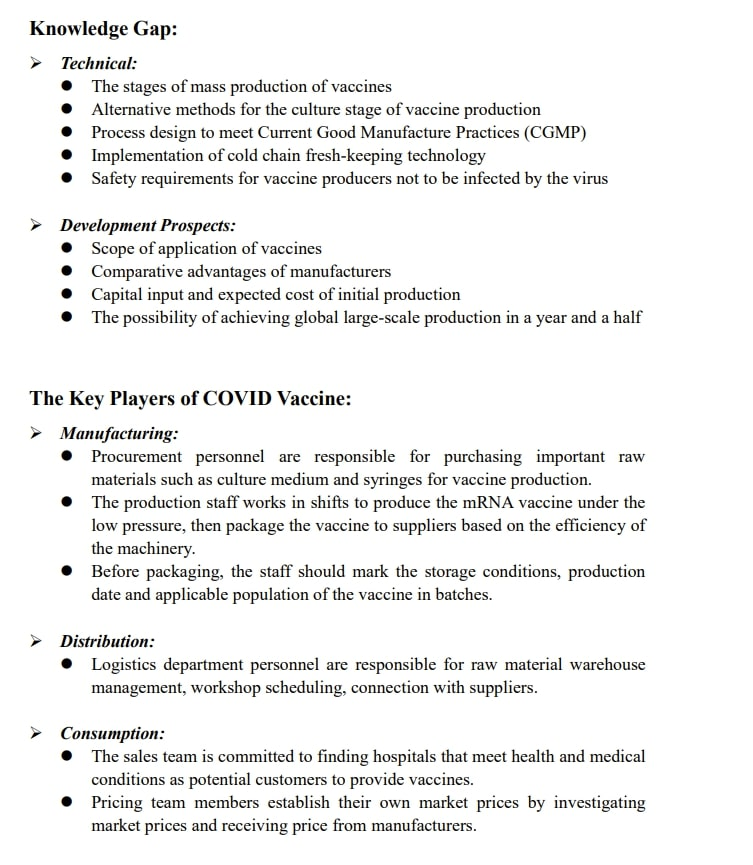

In [17]:
from google.colab import files
uploaded = files.upload()
im = Image.open('tester.jpg')
import IPython.display as display
display.display(im)

In [18]:
text = pytesseract.image_to_string(im)
print(text)

Knowledge Gap:

» Technical:

The stages of mass production of vaccines

Alternative methods for the culture stage of vaccine production

Process design to meet Current Good Manufacture Practices (CGMP)
Implementation of cold chain fresh-keeping technology

Safety requirements for vaccine producers not to be infected by the virus

> Development Prospects:

Scope of application of vaccines
Comparative advantages of manufacturers

Capital input and expected cost of initial production

The possibility of achieving global large-scale production in a year and a half

The Key Players of COVID Vaccine:

> Manufacturing:

Procurement personnel are responsible for purchasing important raw
materials such as culture medium and syringes for vaccine production.

The production staff works in shifts to produce the mRNA vaccine under the
low pressure, then package the vaccine to suppliers based on the efficiency of
the machinery.

Before packaging, the staff should mark the storage conditions, produc

##**Previous Method PyPDF2**

In [9]:
from google.colab import files
uploaded = files.upload()

pdf = open('8d133367-81c3-4f97-b24f-38f6ef3f11371.pdf', 'rb')  
reader = PyPDF2.PdfFileReader(pdf) 

# extracting text from page 
corpus = reader.getPage(0).extractText()
print(corpus)
pdf.close() 

Saving 8d133367-81c3-4f97-b24f-38f6ef3f11371.pdf to 8d133367-81c3-4f97-b24f-38f6ef3f11371.pdf
K n o w l e d g e G a p :
T e c h n i c a l :
T h e s t a g e s o f m a s s p r o d u c t i o n o f v a c c i n e s
A l t e r n a t i v e m e t h o d s f o r t h e c u l t u r e s t a g e o f v a c c i n e p r o d u c t i o n
P r o c e s s d e s i g n t o m e e t C u r r e n t G o o d M a n u f a c t u r e P r a c t i c e s ( C G M P )
I m p l e m e n t a t i o n o f c o l d c h a i n f r e s h - k e e p i n g t e c h n o l o g y
S a f e t y r e q u i r e m e n t s f o r v a c c i n e p r o d u c e r s n o t t o b e i n f e c t e d b y t h e v i r u s
D e v e l o p m e n t P r o s p e c t s :
S c o p e o f a p p l i c a t i o n o f v a c c i n e s
C o m p a r a t i v e a d v a n t a g e s o f m a n u f a c t u r e r s
C a p i t a l i n p u t a n d e x p e c t e d c o s t o f i n i t i a l p r o d u c t i o n
T h e p o s s i b i l i t y o f a c h i e v i n g g l o b a l l a r g e - s

##**Trying to solve the Image classification task with OCR too**

Intuition: Image tasks are mainly involving drawing diagrams, which will include certain keywords as well. Therefore, by running OCR, we can also try to extract text from such images and classify for spam. Of course, we need to reduce the weight of these results due to the large margin of error.

Saving tester2.png to tester2 (2).png


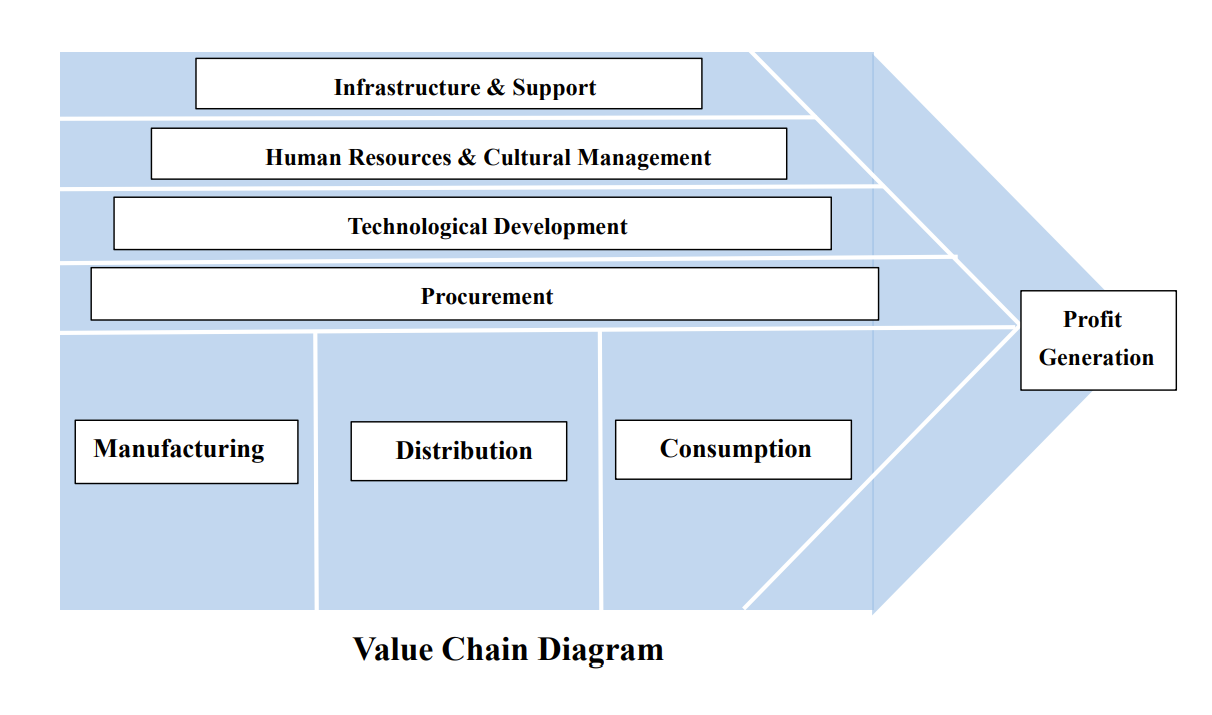

In [22]:
from google.colab import files
uploaded = files.upload()
img = Image.open('tester2.png')
display.display(img)

In [43]:
text2 = pytesseract.image_to_string(img)
print(text2)

 

 

Infrastructure & Support

 

 

 

 

Human Resources & Cultural Management

 

 

 

 

Technological Development

 

 

 

 

Procurement

 

 

 

 

Profit

Generation

 

 

 

Manufacturing

Distribution

 

 

 

 

Consumption

 

 

Value Chain Diagram

 



In [35]:
text2flat = repr(text2).replace('\n', '')
print(text2flat)

' \n\n \n\nInfrastructure & Support\n\n \n\n \n\n \n\n \n\nHuman Resources & Cultural Management\n\n \n\n \n\n \n\n \n\nTechnological Development\n\n \n\n \n\n \n\n \n\nProcurement\n\n \n\n \n\n \n\n \n\nProfit\n\nGeneration\n\n \n\n \n\n \n\nManufacturing\n\nDistribution\n\n \n\n \n\n \n\n \n\nConsumption\n\n \n\n \n\nValue Chain Diagram\n\n \n\x0c'


The snippet below works to extract empty lines

In [42]:
keepText = []
textiter = iter(text2.splitlines())
for line in textiter:
  if line == '' or line == ' ':
    continue
  else: 
    keepText.append(line)
print(keepText)

['Infrastructure & Support', 'Human Resources & Cultural Management', 'Technological Development', 'Procurement', 'Profit', 'Generation', 'Manufacturing', 'Distribution', 'Consumption', 'Value Chain Diagram']
